## Desafío - Data Wrangling

Gerick Toro - Comisión 46270

---

In [1]:
# para eliminar warnings de la biblioteca seaborn
import warnings

warnings.filterwarnings("ignore")

In [2]:
# librerias que emplearemos en el analisis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
# URL donde tenemos almacenados los dataframes
url = "https://raw.githubusercontent.com/gerickt/coder/main/Data/AirlinePassengerSatisfaction/airline_passenger_satisfaction.csv"
dic = "https://raw.githubusercontent.com/gerickt/coder/main/Data/AirlinePassengerSatisfaction/data_dictionary.csv"
# Construyendo los dataframes
airline_data = pd.read_csv(url, index_col=0)
data_dictionary = pd.read_csv(dic, index_col=0)

In [30]:
# Verificamos el tamaño del dataframe
airline_data.shape

(129880, 23)

#### Tratar los Valores Nulos:

In [16]:
# Verificar la presencia de valores nulos o NaN en el dataset
missing_values = airline_data.isnull().sum()
print(missing_values)

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

In [21]:
# Resumen estadístico para identificar posibles valores atípicos
airline_data.describe()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,15.119360,997.452477,38.071126,38.407410,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Mas del 50% de los valores son 0, en "Arrival Delay" por lo que podemos asumir, que casi siempre llegan en 0, por lo que podemos tratar los valores nulos reempalzandolos con ceros (0).

In [31]:
airline_data["Arrival Delay"].fillna(0, inplace=True)

In [32]:
# Verificamos si queda algun valor nulo en el dataframe
airline_data.isnull().sum().any()

False

In [33]:
# Verificamos si hay valores duplicados
airline_data.duplicated().sum()

0

#### Identificar y Tratar Outliers:

La distribución de los retrasos en la llegada muestra una concentración significativa de valores en torno a 0, lo que indica que muchos vuelos llegan a tiempo o con retrasos mínimos. Sin embargo, también hay una cola larga en la distribución, lo que sugiere la presencia de algunos retrasos muy largos.

In [34]:
# Calcular estadísticas clave para 'Arrival Delay'
arrival_delay_stats = airline_data["Arrival Delay"].describe()
arrival_delay_stats

count    129880.000000
mean         15.091129
std          38.407410
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay, dtype: float64

- Estadísticas Clave
- Media: 15.09 minutos
- Desviación Estándar: 38.40 minutos
- Mediana (50%): 0 minutos (la mitad de los vuelos llegaron a tiempo o antes de tiempo)
- Máximo: 1584 minutos

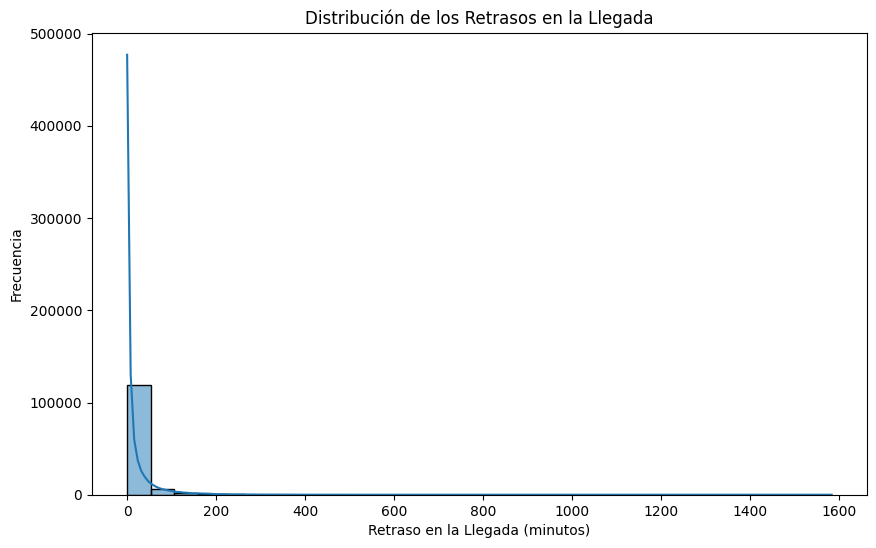

In [35]:
# Analizar la distribución de 'Arrival Delay'
plt.figure(figsize=(10, 6))
sns.histplot(airline_data["Arrival Delay"].dropna(), kde=True, bins=30)
plt.title("Distribución de los Retrasos en la Llegada")
plt.xlabel("Retraso en la Llegada (minutos)")
plt.ylabel("Frecuencia")
plt.show()

 Usaremos el método del rango intercuartílico (IQR) para establecer límites superior e inferior, más allá de los cuales los valores se consideran atípicos.

In [36]:
# Definición de una función para calcular el IQR y los límites para identificar outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound


# Columnas a examinar para outliers
columns_to_check = ["Age", "Flight Distance", "Departure Delay", "Arrival Delay"]

In [38]:
# Identificar outliers en cada columna
outliers_info = {}
for column in columns_to_check:
    lower_bound, upper_bound = detect_outliers(airline_data, column)
    outliers_info[column] = {
        "Límite inferior": lower_bound,
        "Límite superior": upper_bound,
        "Outliers inferior": (airline_data[column] < lower_bound).sum(),
        "Outliers superior": (airline_data[column] > upper_bound).sum(),
    }

outliers_info_df = pd.DataFrame(outliers_info).T
outliers_info_df

,Límite inferior,Límite superior,Outliers inferior,Outliers superior
Age,-9.0,87.0,0.0,0.0
Flight Distance,-1581.0,3739.0,0.0,2855.0
Departure Delay,-18.0,30.0,0.0,18098.0
Arrival Delay,-19.5,32.5,0.0,17492.0


#### Conclusión

Hemos decidido mantener los outliers para el análisis de la satisfacción del cliente, ya que antener estos outliers puede proporcionar una visión más completa de todas las experiencias de los pasajeros, incluyendo aquellas que son atípicas pero pueden tener un impacto significativo en la satisfacción general.

Por lo tanto nuestro dataframe esta listo para empezar con el EDA.